<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/Face_Emotion_Recognition(Using_TF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2 as c

In [ ]:
img = c.imread(r"/content/drive/MyDrive/DataSets/Face_Emtion_Recognition/train/0/Training_3908.jpg")

In [ ]:
img.shape

(48, 48, 3)

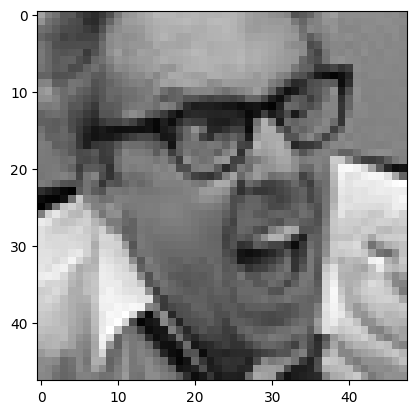

In [ ]:
plt.imshow(img)

In [ ]:
data_dir = r"/content/drive/MyDrive/DataSets/Face_Emtion_Recognition/train"

In [ ]:
# classes = ['angry' , 'disgust' , 'fear' , 'happy' , 'neutral' , 'sad' , 'surprise']
classes = [0,1,2,3,4,5,6]

In [ ]:
# training = []

# def Training_Data():
#     for cat in classes:
#         path = os.path.join(data_dir , cat)
#         class_name = classes.index(cat)
#         for img in os.listdir(path):
#             try:
#                 img_array = c.imread(os.path.join(path,img))
#                 img_array = c.cvtColor(img_array, c.COLOR_BGR2RGB)
#                 arr = c.resize(img_array,(224,224))
#                 training.append([arr , class_name])
#             except Exception as e:
#                 pass

In [ ]:
# Training_Data()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = val_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [ ]:
import numpy as np
unique, counts = np.unique(train_data.classes, return_counts=True)
for cls, count in zip(train_data.class_indices.keys(), counts):
    print(f"{cls}: {count} images")

0: 3196 images
1: 349 images
2: 3278 images
3: 5772 images
4: 3972 images
5: 3864 images
6: 2537 images


In [ ]:
print(len(train_data))

718


In [ ]:
# import random

# random.shuffle(train_data)

In [ ]:
# x = []
# y = []

# for features , label in train_data:
#     x.append(features)
#     y.append(label)

In [ ]:
from tensorflow.keras.applications import MobileNetV2, ResNet50, EfficientNetB0, VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping


In [ ]:
base_model = VGG19(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)
# base_model.trainable = False
# base_model.trainable = True

# fine_tune_at = len(base_model.layers) - 30

# for layer in base_model.layers[:fine_tune_at]:
#     layer.trainable = False

In [ ]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,199,367 (77.05 MB)

 Trainable params: 20,198,343 (77.05 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [ ]:
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
er_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

callbacks_list = [er_stop, checkpoint, reduce_lr]


In [ ]:
train_subset = int(0.1 * len(train_data))
val_subset = int(0.1 * len(val_data))

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_index = train_data.class_indices
classes = list(class_index.keys())
labels = train_data.classes

class_wights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

print(class_wights)
print(classes)

[1.02664044 9.40155546 1.00095877 0.56845857 0.82606819 0.84915705
 1.29331607]
['0', '1', '2', '3', '4', '5', '6']


In [ ]:
class_wights = dict(enumerate(class_wights))
print("Class weights:", class_wights)

Class weights: {0: np.float64(1.0266404434114071), 1: np.float64(9.401555464592715), 2: np.float64(1.0009587727708533), 3: np.float64(0.5684585684585685), 4: np.float64(0.826068191627104), 5: np.float64(0.8491570541259982), 6: np.float64(1.2933160650937552)}


In [ ]:
steps_per_epoch = 100
validation_steps = 25

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=callbacks_list
)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.1996 - loss: 1.9296
Epoch 1: val_accuracy improved from -inf to 0.22125, saving model to best_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 1253s 12s/step - accuracy: 0.1996 - loss: 1.9294 - val_accuracy: 0.2212 - val_loss: 11.9964 - learning_rate: 1.0000e-04
Epoch 2/10
 97/100 ━━━━━━━━━━━━━━━━━━━━ 22s 8s/step - accuracy: 0.2234 - loss: 1.8837

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(train_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_data.classes

print(classification_report(y_true, y_pred_classes, target_names=val_data.class_indices.keys()))
sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True, fmt='d')
plt.show()
